In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from json import JSONEncoder

In [2]:
class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

In [3]:
# ppo parameters
ts = 0.5*1e6
lr = 0.001
ec = 0.01
#ec_list=[0.01,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5]

# circuit parameters
#N_QUBITS=2
N_QUBITS_list=[2,3,4,5,6,7,8,9,10]#,15,20,25,30]

#HALF_DEPTH=2
#DEPTH=int(2*HALF_DEPTH)
HALF_DEPTH_list=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]#,26,27]#,28,29,30]#,25,30]
DEPTH_list=[int(2*HALF_DEPTH_list[i]) for i in range(np.size(HALF_DEPTH_list))]

positive_reward = 50
penalty_slope = 0#[0,0.5,1,2,3,4,5]

#num_full_learning = 1

In [20]:
with open("./data_ps_0/rewards_list_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as rewards_list_ps_0:
    rewards_list = json.load(rewards_list_ps_0)

In [21]:
with open("./data_ps_0/measurements_list_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as measurements_list_ps_0:
    measurements_list = json.load(measurements_list_ps_0)

In [22]:
with open("./data_ps_0/num_measurements_list_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as num_measurements_list_ps_0:
    num_measurements_list = json.load(num_measurements_list_ps_0)

In [23]:
with open("./data_ps_0/avg_rewards_over_ep_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as avg_rewards_over_ep_ps_0:
    avg_rewards_over_ep = json.load(avg_rewards_over_ep_ps_0)

In [24]:
with open("./data_ps_0/avg_lens_per_ep_over_ep_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as avg_lens_per_ep_over_ep_ps_0:
    avg_lens_per_ep_over_ep = json.load(avg_lens_per_ep_over_ep_ps_0)

In [25]:
with open("./data_ps_0/avg_norm_lens_per_ep_over_ep_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as avg_norm_lens_per_ep_over_ep_ps_0:
    avg_norm_lens_per_ep_over_ep = json.load(avg_norm_lens_per_ep_over_ep_ps_0)

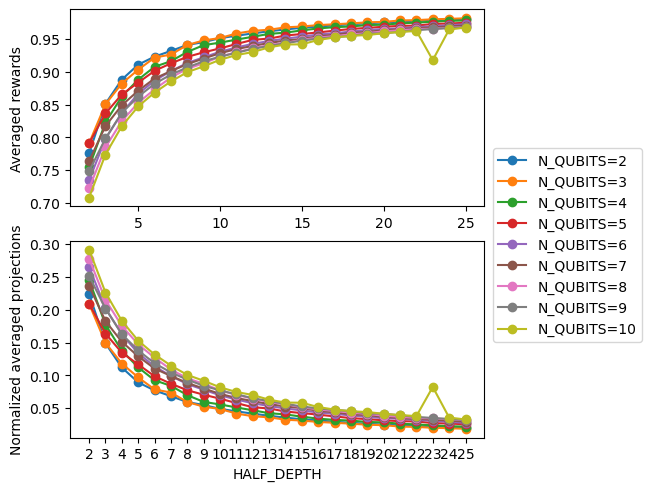

In [26]:
#x_axis = [i+1 for i in range(num_full_learning)], np.size(all_avg_rews)
#have the different learning, put avg_all and variance_all(np.var())

x1_axis = [int(i) for i in HALF_DEPTH_list]
        
fig, axs = plt.subplot_mosaic([['top'],['bottom']],layout='constrained')
    
for i in range(np.size(N_QUBITS_list)):
    N_QUBITS = N_QUBITS_list[i]
    axs['top'].plot(x1_axis,avg_rewards_over_ep[i],linestyle='-', marker='o')
axs['top'].set_ylabel('Averaged rewards')
plt.xticks(x1_axis, x1_axis)


for i in range(np.size(N_QUBITS_list)):
    N_QUBITS = N_QUBITS_list[i]
    axs['bottom'].plot(x1_axis,avg_norm_lens_per_ep_over_ep[i],label="N_QUBITS={N_QUBITS}".format(N_QUBITS=N_QUBITS),linestyle='-', marker='o')
plt.xlabel('HALF_DEPTH')
plt.ylabel('Normalized averaged projections')
plt.xticks(x1_axis, x1_axis)

fig.legend(loc='outside right')

plt.show()

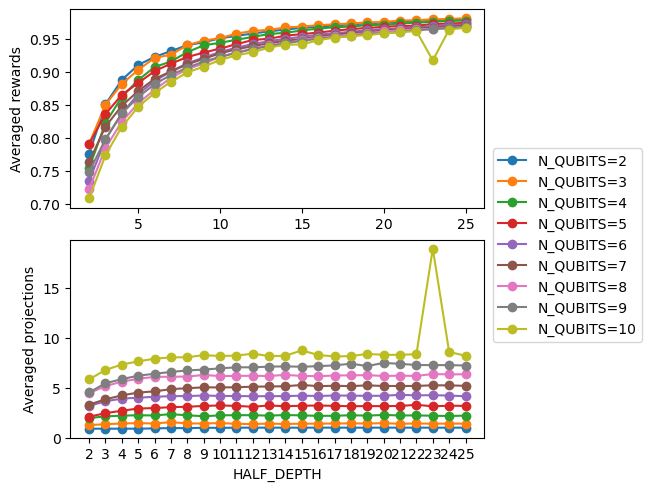

In [11]:
#x_axis = [i+1 for i in range(num_full_learning)], np.size(all_avg_rews)
#have the different learning, put avg_all and variance_all(np.var())

x1_axis = [int(i) for i in HALF_DEPTH_list]
        
fig, axs = plt.subplot_mosaic([['top'],['bottom']],layout='constrained')
    
for i in range(np.size(N_QUBITS_list)):
    N_QUBITS = N_QUBITS_list[i]
    axs['top'].plot(x1_axis,avg_rewards_over_ep[i],linestyle='-', marker='o')
axs['top'].set_ylabel('Averaged rewards')
plt.xticks(x1_axis, x1_axis)


for i in range(np.size(N_QUBITS_list)):
    N_QUBITS = N_QUBITS_list[i]
    axs['bottom'].plot(x1_axis,avg_lens_per_ep_over_ep[i],label="N_QUBITS={N_QUBITS}".format(N_QUBITS=N_QUBITS),linestyle='-', marker='o')
plt.xlabel('HALF_DEPTH')
plt.ylabel('Averaged projections')
plt.xticks(x1_axis, x1_axis)

fig.legend(loc='outside right')

plt.savefig("average_half_depth.pdf")

plt.show()

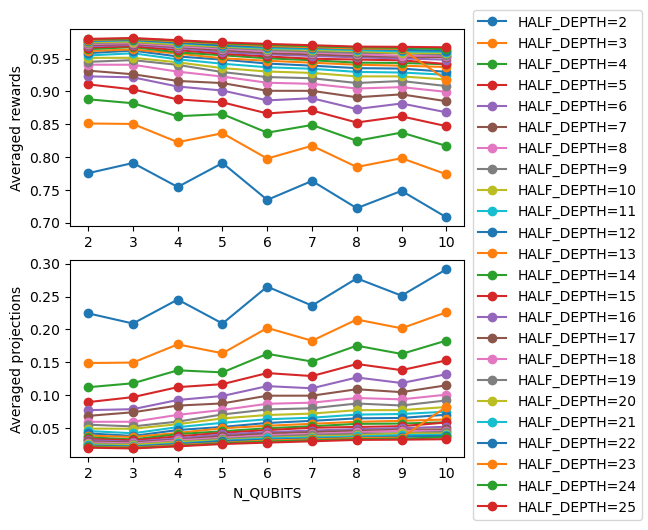

In [12]:
#x_axis = [i+1 for i in range(num_full_learning)], np.size(all_avg_rews)
#have the different learning, put avg_all and variance_all(np.var())

x2_axis = [int(i) for i in N_QUBITS_list]

avg_rewards_over_ep_N_QUBITS=np.transpose(avg_rewards_over_ep)
avg_lens_per_ep_over_ep_N_QUBITS=np.transpose(avg_lens_per_ep_over_ep)

avg_norm_lens_per_ep_over_ep_N_QUBITS=np.transpose(avg_norm_lens_per_ep_over_ep)

        
fig, axs = plt.subplot_mosaic([['top'],['bottom']],layout='constrained')
    

for i in range(np.size(HALF_DEPTH_list)):
    HALF_DEPTH = HALF_DEPTH_list[i]
    axs['top'].plot(x2_axis,avg_rewards_over_ep_N_QUBITS[i],linestyle='-', marker='o')
axs['top'].set_ylabel('Averaged rewards')
#axs['top'].set_aspect('equal')

for i in range(np.size(HALF_DEPTH_list)):
    HALF_DEPTH = HALF_DEPTH_list[i]
    axs['bottom'].plot(x2_axis,avg_norm_lens_per_ep_over_ep_N_QUBITS[i],linestyle='-', marker='o',label="HALF_DEPTH={HALF_DEPTH}".format(HALF_DEPTH=HALF_DEPTH))
#axs['bottom'].set_aspect('equal')
plt.xlabel('N_QUBITS')
plt.ylabel('Averaged projections')

plt.xticks(x2_axis, x2_axis)

#plt.ylim(0, 11)
#plt.xlim(0, 11)

fig.legend(loc='outside right')

plt.show()

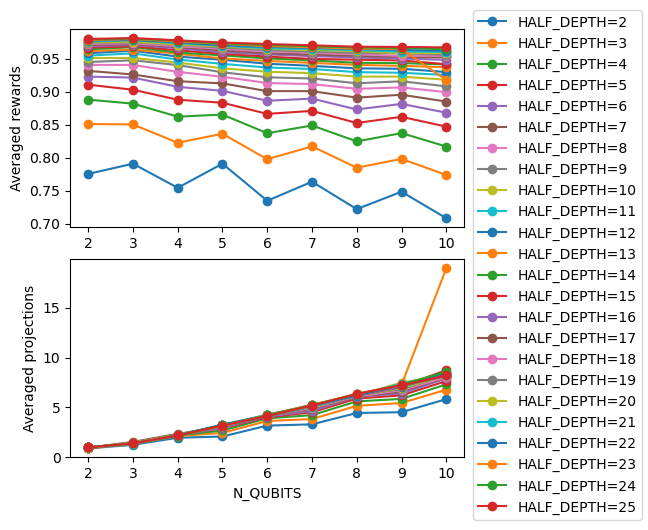

In [13]:
#x_axis = [i+1 for i in range(num_full_learning)], np.size(all_avg_rews)
#have the different learning, put avg_all and variance_all(np.var())

x2_axis = [int(i) for i in N_QUBITS_list]

avg_rewards_over_ep_N_QUBITS=np.transpose(avg_rewards_over_ep)
avg_lens_per_ep_over_ep_N_QUBITS=np.transpose(avg_lens_per_ep_over_ep)

avg_norm_lens_per_ep_over_ep_N_QUBITS=np.transpose(avg_norm_lens_per_ep_over_ep)

        
fig, axs = plt.subplot_mosaic([['top'],['bottom']],layout='constrained')
    

for i in range(np.size(HALF_DEPTH_list)):
    HALF_DEPTH = HALF_DEPTH_list[i]
    axs['top'].plot(x2_axis,avg_rewards_over_ep_N_QUBITS[i],linestyle='-', marker='o')
axs['top'].set_ylabel('Averaged rewards')
#axs['top'].set_aspect('equal')

for i in range(np.size(HALF_DEPTH_list)):
    HALF_DEPTH = HALF_DEPTH_list[i]
    axs['bottom'].plot(x2_axis,avg_lens_per_ep_over_ep_N_QUBITS[i],linestyle='-', marker='o',label="HALF_DEPTH={HALF_DEPTH}".format(HALF_DEPTH=HALF_DEPTH))
#axs['bottom'].set_aspect('equal')
plt.xlabel('N_QUBITS')
plt.ylabel('Averaged projections')

plt.xticks(x2_axis, x2_axis)

#plt.ylim(0, 11)
#plt.xlim(0, 11)

fig.legend(loc='outside right')

plt.show()

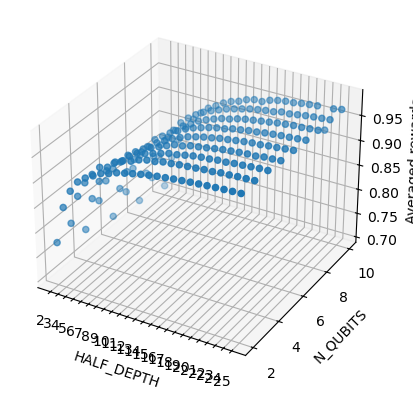

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#z = np.concatenate(avg_rewards_over_ep)

x,y = np.meshgrid(x1_axis,x2_axis)

ax.set_xlabel('HALF_DEPTH')
ax.set_ylabel('N_QUBITS')
ax.set_zlabel('Averaged rewards')

plt.xticks(x1_axis, x1_axis)

ax.scatter3D(x, y, avg_rewards_over_ep)

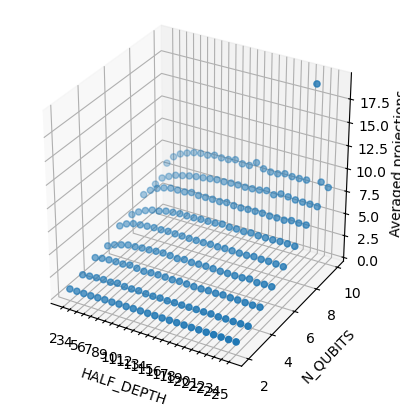

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#z = np.concatenate(avg_rewards_over_ep)

x,y = np.meshgrid(x1_axis,x2_axis)

ax.set_xlabel('HALF_DEPTH')
ax.set_ylabel('N_QUBITS')
ax.set_zlabel('Averaged projections')

plt.xticks(x1_axis, x1_axis)

ax.set_box_aspect([int(np.size(x1_axis)/np.size(x1_axis)), 1, 1]) 

ax.scatter3D(x, y, avg_lens_per_ep_over_ep, linestyle='-', marker='o')

In [16]:
mean_layers_list = [[[] for j in range(np.size(HALF_DEPTH_list))]for j in range(np.size(N_QUBITS_list))]
avg_mean_layers_over_ep=[[] for i in range(np.size(N_QUBITS_list))]


for i in range(np.size(N_QUBITS_list)):
    N_QUBITS = N_QUBITS_list[i]
    for j in range(np.size(HALF_DEPTH_list)):
        HALF_DEPTH = HALF_DEPTH_list[j]
        num, a, b = np.shape(measurements_list[i][j])
        for k in range(num):#k counts the number of episodes
            m_per_layer = [np.sum(layer) for layer in measurements_list[i][j][k]]
            if sum(m_per_layer) != 0:
                layers = [HALF_DEPTH-i for i in range(HALF_DEPTH)]
                mean_layers_list[i][j].append(np.average(layers, weights=m_per_layer)/HALF_DEPTH)
            elif sum(m_per_layer) == 0:
                mean_layers_list[i][j].append(int(0))
        
        avg_mean_layers_over_ep[i].append(np.mean(mean_layers_list[i][j]))

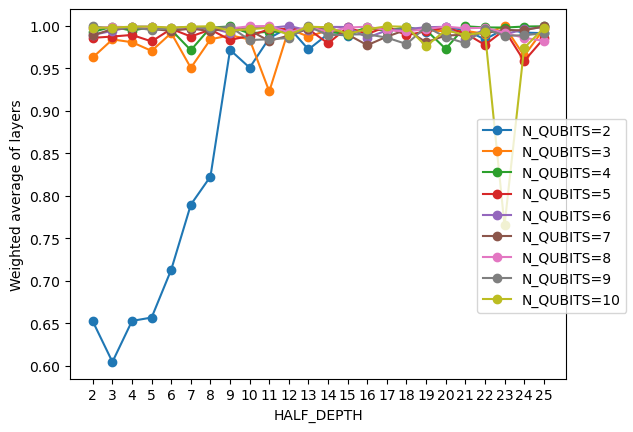

In [17]:
fig=plt.figure()

for i in range(np.size(N_QUBITS_list)):
    N_QUBITS = N_QUBITS_list[i]
    plt.plot(x1_axis,avg_mean_layers_over_ep[i],label="N_QUBITS={N_QUBITS}".format(N_QUBITS=N_QUBITS),linestyle='-', marker='o')
plt.xlabel('HALF_DEPTH')
plt.ylabel('Weighted average of layers')
plt.xticks(x1_axis, x1_axis)

fig.legend(loc='outside right')

plt.show()

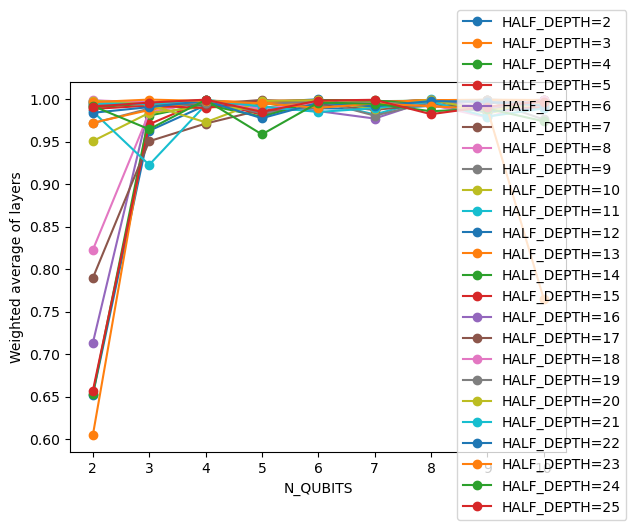

In [18]:
fig=plt.figure()

avg_mean_layers_over_ep_N_QUBITS=np.transpose(avg_mean_layers_over_ep)

for i in range(np.size(HALF_DEPTH_list)):
    HALF_DEPTH = HALF_DEPTH_list[i]
    plt.plot(x2_axis,avg_mean_layers_over_ep_N_QUBITS[i],label="HALF_DEPTH={HALF_DEPTH}".format(HALF_DEPTH=HALF_DEPTH),linestyle='-', marker='o')
plt.xlabel('N_QUBITS')
plt.ylabel('Weighted average of layers')
plt.xticks(x2_axis, x2_axis)

fig.legend(loc='outside right')

plt.show()

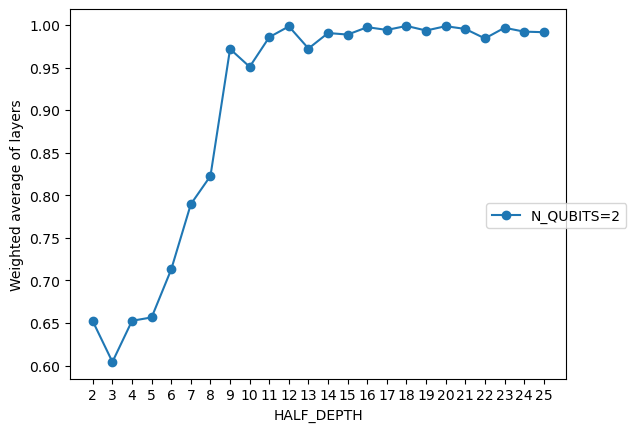

In [19]:
fig=plt.figure()

#for i in range(np.size(N_QUBITS_list)):
i=0
N_QUBITS = N_QUBITS_list[i]
plt.plot(x1_axis,avg_mean_layers_over_ep[i],label="N_QUBITS={N_QUBITS}".format(N_QUBITS=N_QUBITS),linestyle='-', marker='o')
plt.xlabel('HALF_DEPTH')
plt.ylabel('Weighted average of layers')
plt.xticks(x1_axis, x1_axis)

fig.legend(loc='outside right')

plt.show()

In [ ]:



#write the text files of rewards_list, measurements_list, num_measurements_list, avg_rewards_over_ep, avg_lens_per_ep_over_ep

In [ ]:
#output the text file

In [ ]:
#plot
#fitting
#averaged layers
#saturation time
#local measurements and their dynamics

In [ ]:
averaged_entropies = []
episodes=1000
a=0
b=18
for measurement in measurements_list[a][b]:
    entropies = []
    N_QUBITS=N_QUBITS_list[a]
    HALF_DEPTH=HALF_DEPTH_list[b]
    for _ in range(episodes):
        ran_lay=random_layers(N_QUBITS,HALF_DEPTH)
        mea_lay=measure_layers(N_QUBITS,HALF_DEPTH,measurement)
        circ = create_circuit(N_QUBITS,HALF_DEPTH,ran_lay,mea_lay)
        state_initial = pc.stabilizer.zero_state(N_QUBITS)
        state_final = circ.forward(state_initial)
        entropy = averaged_EE(state_final)
        entropies.append(entropy)
        
    
    averaged_entropies.append(np.mean(entropies))

#normalized_averaged_entropies = [float(i)/sum(averaged_entropies) for i in averaged_entropies]
    
plt.figure(figsize=(10,6))
plt.hist(averaged_entropies,density=False)
plt.xlabel('Averaged von Neumann Entropy')
plt.ylabel('Count')
plt.title('Histogram of Averaged von Neumann Entropies')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
a,b,c=plt.hist(averaged_entropies, density=True)

plt.xlabel('Averaged von Neumann Entropy')
plt.ylabel('Count')
plt.title('Histogram of Averaged von Neumann Entropies')
plt.xticks(rotation=90)
plt.show()

In [ ]:
normalized_a=[i/sum(a) for i in a]
plt.stairs(normalized_a,b)

In [ ]:
averaged_measurements = np.mean(measurements_list[0][0], axis=0)
variance_measurements = np.var(measurements_list[0][0], axis=0)

plt.figure()
plt.imshow(averaged_measurements, cmap="YlGnBu")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(variance_measurements, cmap="hot")
plt.colorbar()
plt.show()

In [ ]:
N_QUBITS, HALF_DEPTH, z

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')

a=3
b=18

N_QUBITS = N_QUBITS_list[a]
HALF_DEPTH = HALF_DEPTH_list[b]

cord=[[i,j] for i in range(HALF_DEPTH) for j in range (N_QUBITS)]

averaged_measurements = np.mean(measurements_list[a][b], axis=0)
#variance_measurements = np.var(measurements_list[i][j], axis=0)

y=np.transpose([cord[i][0] for i in range (N_QUBITS*HALF_DEPTH)])
x=np.transpose([cord[i][1] for i in range (N_QUBITS*HALF_DEPTH)])
z=np.zeros(N_QUBITS*HALF_DEPTH,int)

width = 0.5
depth = 0.5

avg_m=[]
for i in range (HALF_DEPTH-1,-1,-1):
    avg_m.append(averaged_measurements[i])
heights=np.concatenate(avg_m)


#plt.xlim(max(x), min(x))

ax.bar3d(x, y, z, width, depth, heights, shade=True)
ax.set_box_aspect([int(N_QUBITS), int(HALF_DEPTH), 10]) 

ax.set_xticks([i for i in range (N_QUBITS)]) 
ax.set_yticks([i for i in range (HALF_DEPTH)]) 

plt.show()

In [ ]:
alpha = [0,0.5,1,4,5]
for aa in alpha:
    x = range(DEPTH)
    y = [penalty(xx,aa) for xx in x]
    plt.plot(x,y)

In [ ]:
HALF_DEPTH = 10
DEPTH = 2*HALF_DEPTH
alpha=2

x = range(HALF_DEPTH)
#y = [2*(0.5-(1/(1+np.exp(-alpha*xx))-0.5)) for xx in x]
y = [2*(1-(1/(1+np.exp(-alpha*xx)))) for xx in x]
plt.scatter(x,y)

In [ ]:
sum(y)

In [ ]:
theta =np.random.randint(2, size=(HALF_DEPTH,N_QUBITS))
measurements_list[0][0][0]

In [ ]:
m_per_layer, layers,mean_layers

In [ ]:
m_per_layer = [np.sum(layer) for layer in measurements_list[0][18][0]]
layers = [20-i for i in range(20)]
mean_layers = np.average(layers,weights=m_per_layer)/2

measurements_list[0][18][0], m_per_layer, layers, mean_layers

In [ ]:
m_per_layer